## Assignment 1 

This assignment is based on the video discussed in module 1.

John Rauser ( 2014). Statistics Without the Agonizing Pain. Strata Hadoop 2014. Retrieved from https://www.youtube.com/watch?v=5Dnw46eC-0o

(Source: https://www.youtube.com/watch?v=5Dnw46eC-0o )




 
  
 

## Learning outcomes

- Use code to work with data
- Calculate basic statistical measures 
- Implement a data simulation by using resampling 


**Question**

1. Using the dataset from the video ( _mosquitos_data.csv_) in the folder, write Python code to:

    - Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water) 
    - What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.
    - Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

2. Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

## Hints

- Use pandas, matplotlib, or seaborn to plot boxplots in Python. 
- Label the graphs wherever applicable e.g, title, legend, units etc.





In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
data = pd.read_csv('C:/Users/User/Downloads/mosquitos_data.csv')
data

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer
5,31,Beer
6,24,Beer
7,21,Beer
8,20,Beer
9,19,Beer


Text(0.5, 1.0, 'Mosquitos Response Based On Human Liquid Intake')

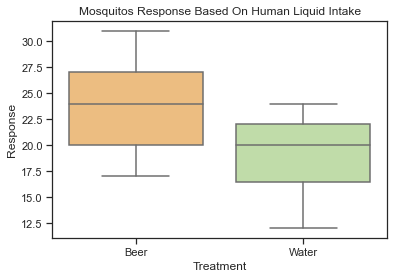

In [3]:
sns.set(style = "ticks")
sns.boxplot(x='Treatment',y='Response', data=data, palette='Spectral')
plt.title('Mosquitos Response Based On Human Liquid Intake')

This graph shows us a comparison of Beer versus Water treatment individuals.

Ranging from 12 to 30 mosquitos, using a box and whisker plot allows us to see that individuals who had the beer treatment were more attractive to mosquitos than the individuals who had the water treatment.

The table above shows us that the median of the beer measurements, 24 mosquitos, corresponds with the higher interquartile of the water treatment group.

The median of the water treatment group, 20 mosquitos, corresponds to the lower interquartile of the beer treatment group.

This shows us that a higher number of mosquitos targeted the beer group, this is because the lower interquartile for that group is still higher that the median and maximum number of mosquitos in the water group.

#Beer Group

In [4]:
beers = data[data['Treatment']=='Beer']
beer_responses = np.array(beers['Response'])
beer_responses

array([27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
       20, 17, 31, 20, 25, 28, 21, 27], dtype=int64)

In [5]:
num_beer = len(beer_responses)
num_beer

25

In [6]:
beer_mean = np.mean(beer_responses)
print('Mean for Beer responses is %s' % beer_mean)
beer_median = np.median(beer_responses)
print('Median for Beer responses is %s' % beer_median)
beer_std = np.std(beer_responses)
print('Standard Deviation for Beer responses is %s' % beer_std)

Mean for Beer responses is 23.6
Median for Beer responses is 24.0
Standard Deviation for Beer responses is 4.049691346263317


#Water Group

In [7]:
water = data[data['Treatment']=='Water']
water_responses = np.array(water['Response'])
water_responses

array([21, 22, 15, 12, 21, 16, 19, 15, 22, 24, 19, 23, 13, 22, 20, 24, 18,
       20], dtype=int64)

In [8]:
num_water = len(water_responses)
num_water

18

In [9]:
water_mean = np.mean(water_responses)
print('Mean for Water responses is %s' % water_mean)
water_median = np.median(water_responses)
print('Median for Water responses is %s' % water_median)
water_std = np.std(water_responses)
print('Standard Deviation for Water responses is %s' % water_std)

Mean for Water responses is 19.22222222222222
Median for Water responses is 20.0
Standard Deviation for Water responses is 3.567687635111627


In [10]:
obsvd_difference = beer_mean - water_mean
obsvd_difference

4.37777777777778

Statistical measurements correspond to the patterns we see in Table 1.

Mean: Tells us that on an average, around 24 mosquitos are attracted to beer individuals, while the average number of mosquitos attracted to water treatment individuals is 19.

Median: We also saw in the box and whisker plot, the median tells us the middle values of the data for two treatmnets. 24 and 20 for the beer and water treatments.

Standard Deviation : It tells you, on average, how far each response lies from the mean. For Beer Treatment it is 4.04 and for Water treatment it is 3.56.

The difference between the means of two treatments is around 4 mosquitos, which corresponds to the standard deviation of 4 mosquitos, for both treatment variables.

In [11]:
#This is the sampling distribution of the mean difference:
pooled = np.append(beer_responses, water_responses)
pooled

array([27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
       20, 17, 31, 20, 25, 28, 21, 27, 21, 22, 15, 12, 21, 16, 19, 15, 22,
       24, 19, 23, 13, 22, 20, 24, 18, 20], dtype=int64)

[ 0.36444444  2.56222222 -0.59111111 ...  0.07777778  0.74666667
 -2.50222222]


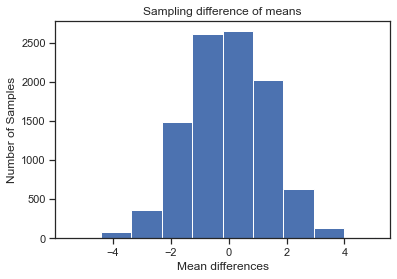

In [12]:
fake_differences = np.zeros(10000)
for i in np.arange(10000):
    # Shuffle
    np.random.shuffle(pooled)
    # Split
    fake_beer = pooled[:num_beer]
    fake_water = pooled[num_beer:]
    # Recalculate mean difference
    fake_diff = np.mean(fake_beer) - np.mean(fake_water)
    # Store mean difference
    fake_differences[i] = fake_diff
print(fake_differences)

plt.hist(fake_differences)
plt.title('Sampling difference of means')
plt.xlabel('Mean differences')
plt.ylabel('Number of Samples');

We are interested to know just how unusual it is to get a difference as big as we actually see, in these many samples of differences we expect by chance, from random sampling.
To do this we calculate : The P-Value
By observing where our initial test statistic (4.38) falls within this distribution, we obtain our p-value. A p-value represents the probability of obtaining values as or more extreme than the observed one (which in our case is 4.38), assuming null hypothesis is true.

In [13]:
num_actual = np.count_nonzero(fake_differences >= obsvd_difference)
num_actual

7

In [14]:
p_num_actual = num_actual / 10000
p_num_actual

0.0007

This is also an estimate of the probability we would see a difference as large as the one we observe, if we were taking random samples from a matching population.

Given the extremely low p-value (<0.1%), the null hypothesis is not a likely explanation for the observed difference (4.38), so we reject the null hypothesis.

In other words, the observed result is not likely to happen by chance. Thus, we conclude that mosquitoes are attracted differently to the two groups (beer and water).